## Assignment 4 - Deadline: Oct 26, 2026, Sun 11pm

#### DSAI 510 Fall 2025

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.boun.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [16]:
# Run this cell first

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the display option to show all rows scrolling with a slider
# pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if it asks, "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Total: 60 pts

## Problem 1 (10 pts)

(a) Load the Ames house dataset from the file **train.csv**.

(b) By using one-hot encoding, create bins for the SalePrice variable wrt the intervals `bins_SalePrice = [0, 250000, 500000, 1000000]`. The result should look like this:

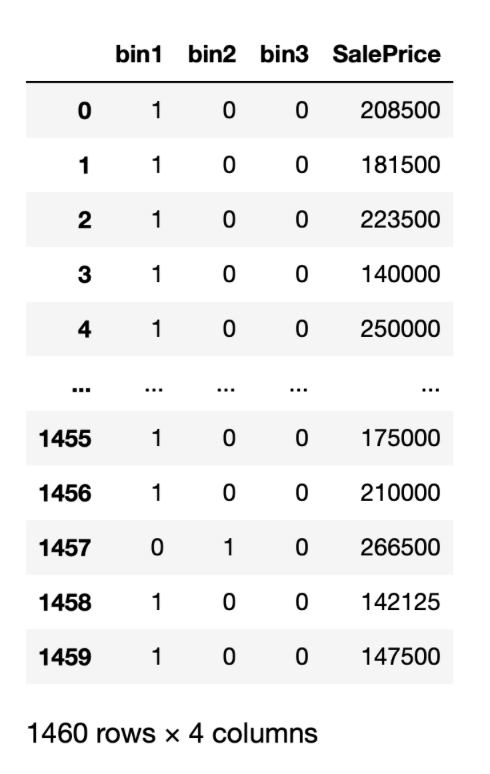

(c) Use simple multiplication between the bin columns and SalePrice to generate this table:

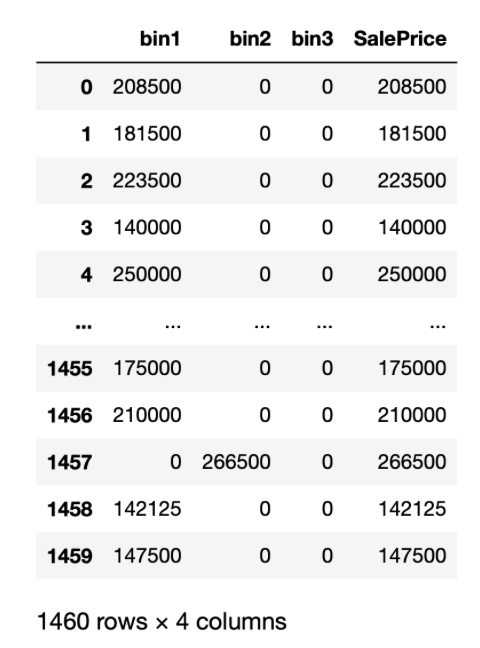

(d) Remove the SalePrice column, melt the final dataframe and by using `sns.boxplot()` create the boxplot below. Make sure you're getting exactly the same plot as below with the same axes names and title.

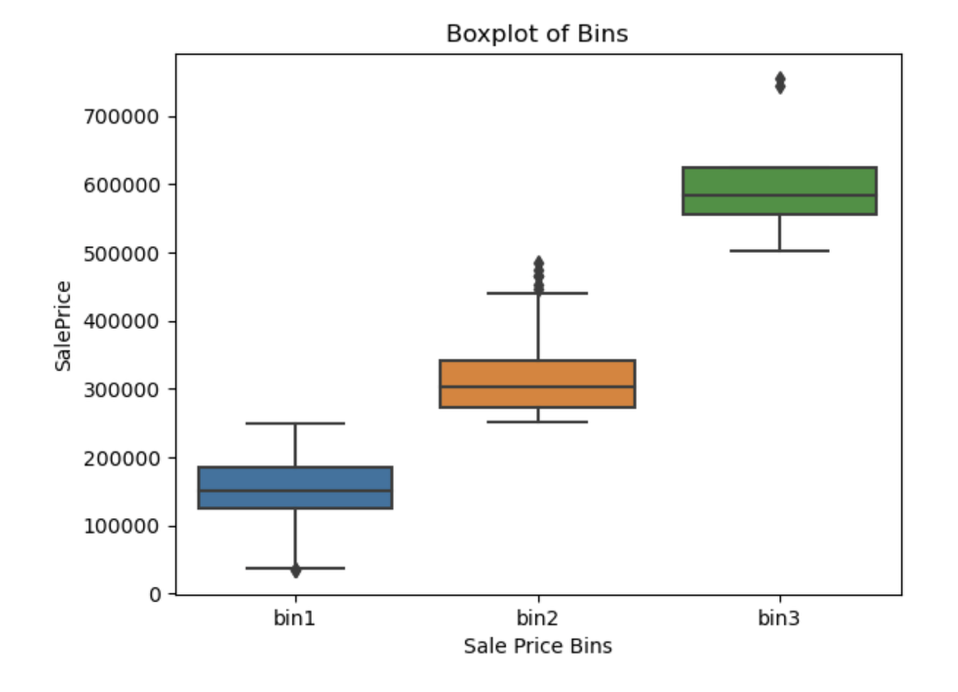


In [17]:
# Break your computations into multiple cells 
# part a)
df = pd.read_csv("house-prices/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [18]:
# part b)
bins_SalePrice = [0, 250000, 500000, 1000000]
labels = ['bin1', 'bin2', 'bin3']

bins = pd.cut(df['SalePrice'], bins=bins_SalePrice, labels=labels)
df_bins = pd.get_dummies(bins).astype(int)
final_df = pd.concat([df_bins, df[['SalePrice']]], axis=1)
final_df

,bin1,bin2,bin3,SalePrice
0,1,0,0,208500
1,1,0,0,181500
2,1,0,0,223500
3,1,0,0,140000
4,1,0,0,250000
...,...,...,...,...
1455,1,0,0,175000
1456,1,0,0,210000
1457,0,1,0,266500
1458,1,0,0,142125


In [19]:
# part c)

for i in range(1, 4):
    final_df[f'bin{i}'] = final_df[f'bin{i}'] * final_df['SalePrice']

final_df

,bin1,bin2,bin3,SalePrice
0,208500,0,0,208500
1,181500,0,0,181500
2,223500,0,0,223500
3,140000,0,0,140000
4,250000,0,0,250000
...,...,...,...,...
1455,175000,0,0,175000
1456,210000,0,0,210000
1457,0,266500,0,266500
1458,142125,0,0,142125


## Problem 2 (5 pts)

Produce the plot of the sliced section of the correlation matrix as shown below. 

Hint: Just use the `correlation_matrix` we generated in the class and single out the relevant variables with `.loc()` method and then use `sns.heatmap()`to create the plot shown below.

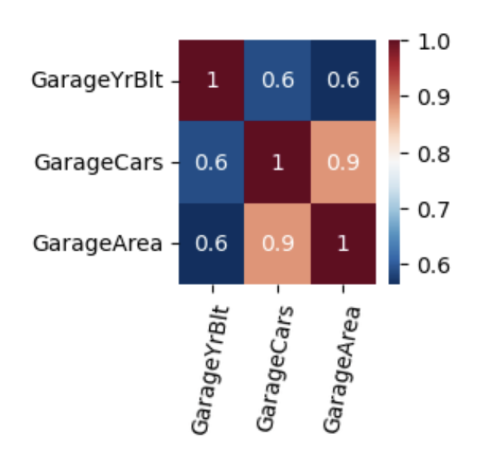


<Axes: >

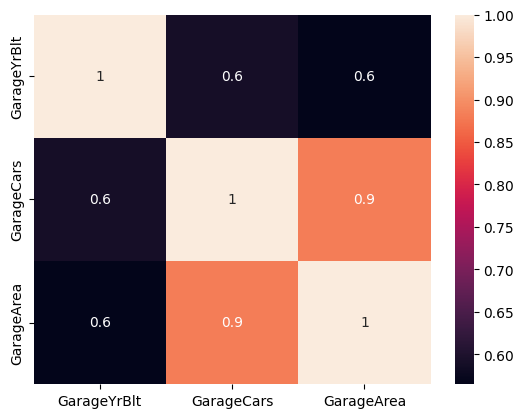

In [26]:
garage_df = df.loc[:, ['GarageYrBlt', 'GarageCars', 'GarageArea']]
g_corr = garage_df.corr()

sns.heatmap(g_corr, annot=True, fmt="0.1g")

## Problem 3 (5 pts)

(a) Load the `Breast_Cancer_Wisconsin.csv` into a dataframe and then **normalize** the numerical columns to the interval [0,1]. Check with `.describe()` and write a sentence or two to explain what exactly in the outcome of `.describe()` tells you the **normalization** you did was successful.

(b) This time, **standardize** the numerical columns. Check with `.describe()` and write a sentence or two to explain what exactly in the outcome of `.describe()` tells you the **standardization** you did was successful.



In [ ]:
# part a)
cancer_df = pd.read_csv("Breast_Cancer_Wisconsin.csv")
norm_df = cancer_df.copy()
num_cols = norm_df.select_dtypes("number").columns
norm_df[num_cols] = (norm_df[num_cols] - norm_df[num_cols].min()) / (norm_df[num_cols].max() - norm_df[num_cols].min())

norm_df.describe()
# for each numerical columns the maximum value is 1 and minimum value is 0, clearly we fitted them into [0, 1] interval

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,0.033318,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,NaN
std,0.137187,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000944,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,NaN
50%,0.000985,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,NaN
75%,0.009661,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
# part b)
std_df = cancer_df.copy()
num_cols = std_df.select_dtypes("number").columns
std_df[num_cols] = (std_df[num_cols] - std_df[num_cols].mean()) / std_df[num_cols].std()

pd.set_option('display.float_format', '{:.6f}'.format)
std_df.describe()
# for each numerical columns we observe standart deviation is equal to 1 and 
# mean is almost zero (there are some negligible -0.00 values, most likely negative values close to 0)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.000000
mean,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,NaN
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
min,-0.242865,-2.027864,-2.227289,-1.982759,-1.453164,-3.109349,-1.608721,-1.113893,-1.260710,-2.741705,...,-2.222039,-1.691872,-1.221348,-2.680337,-1.442609,-1.304683,-1.743529,-2.159060,-1.600431,NaN
25%,-0.235982,-0.688779,-0.725325,-0.691347,-0.666609,-0.710338,-0.746429,-0.743094,-0.737295,-0.702621,...,-0.747971,-0.688972,-0.641571,-0.690623,-0.680485,-0.755849,-0.755735,-0.641299,-0.691303,NaN
50%,-0.235688,-0.214893,-0.104544,-0.235773,-0.294927,-0.034860,-0.221745,-0.341939,-0.397372,-0.071564,...,-0.043477,-0.285729,-0.340881,-0.046802,-0.269264,-0.218040,-0.223272,-0.127297,-0.216254,NaN
75%,-0.172441,0.468980,0.583662,0.499238,0.363188,0.635640,0.493423,0.525599,0.646366,0.530313,...,0.657762,0.539804,0.357275,0.597020,0.539194,0.530674,0.711884,0.449742,0.450366,NaN
max,7.046429,3.967796,4.647799,3.972634,5.245913,4.766717,4.564409,4.239858,3.924477,4.480808,...,3.882489,4.283568,5.924959,3.951897,5.108382,4.696536,2.683516,6.040726,6.840837,NaN


## Problem 4 - Bayes' Theorem (10 pts)

Let’s assume the probability of being infected by covid is 0.1. If you’re infected, PCR tests show you’re covid positive with 80% accuracy. If you’re not infected, PCR tests show you’re covid positive with probability 1/90 (false positive). If you test covid positive in a PCR test, what is the probability that you’re really infected with covid? 

Hint 1: You can use c+ and c- for covid infection, and pcr+ and pcr- for test results, like P(c+)=0.1. <br>
Hint 2: The answer is 0.89. Show in the cell below your algebraic steps involved in your solution. You don't need to write a Python code.


P(c+) = 0.1

P(c-) = 0.9

P(pcr+|c+) = 0.8

P(pcr+|c-) = 1/90

Let c+ = A and pcr+ = B

Question becomes P(A|B)

From Bayes' Theorem:

P(A|B) = P(B|A) * P(A) / P(B)

but we do not know P(B) yet

from Law of Probability we know that P(Positive) = P(True Positive) + P(False Positive)

P(B) = P(B|A) * P(A) + P(B|~A) * P(~A)

P(B) = 0.8 * 0.1 + 1/90 * 0.9

P(B) = 0.09

then

P(A|B) = 0.8 * 0.1 / 0.09

P(A|B) = 8/9 (0.88 but nearly 0.89)

## Problem 5 (5 pts)

Calculate the mean of the random variable K which assumes the values k=1, 2, 3 and 4 by using the pmf given below.


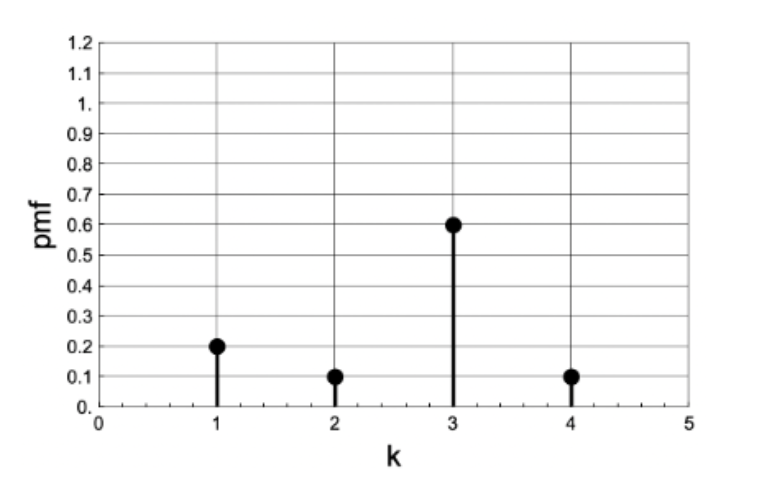

(You don't need to write a Python code; please show the algebraic steps involved in your solution.)

In [ ]:
pmf = [(1, 0.2), (2, 0.1), (3, 0.6), (4, 0.1)]
sum = 0

for (k, prob) in pmf:
    sum += k*prob

print(sum)

2.5999999999999996


Expected Value E[X] is defined as SUM(x * P(X=x) for each x)

k = 1: 1 * 0.2 = 0.2 

k = 2: 2 * 0.1 = 0.2

k = 3: 3 * 0.6 = 1.8

k = 4: 4 * 0.1 = 0.4

SUM = 2.6


## Problem 6 (10 pts)

A joint pmf is provided on the table, where X and Y are not independent. 

(a)	You randomly select values for X and Y. What is the probability that X=2 and Y=3?

(b)	Your friend randomly select values for X and Y, and tells you that X turned out to be 3, but he does not reveal what Y came out to be. What’s the probability that Y=2 given that you know that X=3.

(c)	What is the probability that Y=3 regardless of the value of X?


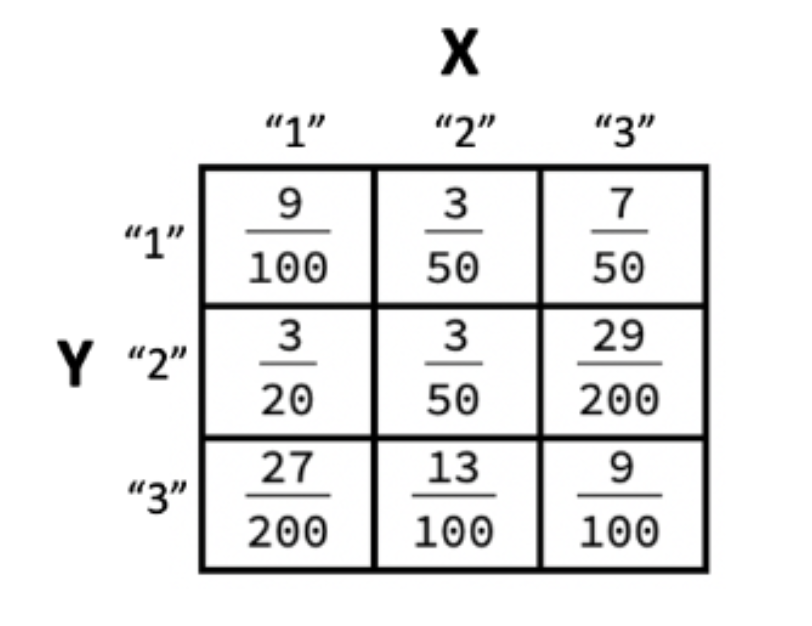

(You don't need to write a Python code; please show the algebraic steps involved in your solution and explain your solution in words if necessary.)

In [ ]:
# (a) 
# Since this is a joint function already we can just choose the box that is X=2 and Y=3
13/100

0.13

In [ ]:
# (b) 
# Question asks conditional probability P(Y=2|X=3), this can be calculates as their joint probabiliy divided by the condition margin.
# P(Y=2|X=3) = P(Y=2, X=3) / P(X=3)
joint = 29/200
margin = 7/50 + 29/200 + 9/100

joint/margin

0.38666666666666666

In [43]:
# (c)
# This is marginal probability so we need to sum up the row where Y=3
27/200 + 13/100 + 9/100

0.355

## Problem 7 (5 pts)

We observe that ice-cream sales and sunburns on people’s back co-occur. Are the statements below True or False?

(a)	"These two phenomena are correlated"    True/False? <br>
(b)	"There’s a direct causal relationship between these two phenomena"    True/False?


In [ ]:
# Your answer (type True or False)
# a) True
# b) False

## Problem 8 (10 pts)

A particle in a box can be somewhere between x=0 and x=1 m. The pdf about where it can be found is given by 

$$f(x)=ax(1-x)$$

(a) What should be the value of $a$ so that the pdf is normalized? (Hint 1: The area under the pdf should be equal to 1.) 

(b) What’s the probability that this particle can be found in the region 0≤x≤0.1?

Hint 2: For the second question, you'll take the integral. You can use https://www.wolframalpha.com for that or get help from fellow students. In any case, explain how you did it, or if you used wolframalpha, attach a screenshot by using a Markdown cell. The answer for part (b) is 0.028; but show your work on how you reached the answer.

a)

$$\int_0^1 ax(1-x) \, dx = a\left[\frac{x^2}{2} - \frac{x^3}{3}\right]_0^1$$

$$= a\left(\frac{1}{2} - \frac{1}{3} - 0\right) = a\left(\frac{3-2}{6}\right) = \frac{a}{6}$$

$$\frac{a}{6} = 1, a = 6$$

b) Since this is a density function, we can integrate the desired interval and find the probability. We already found a=6 from part a) so we can just substitute and continue

$$ P(0 \le x \le 0.1) = \int_{0}^{0.1} f(x) \,dx$$

$$= \int_{0}^{0.1} 6x(1-x) \,dx$$

$$= 6 \left[ \frac{x^2}{2} - \frac{x^3}{3} \right]_{0}^{0.1}$$

$$= 6 \left( \left( \frac{(0.1)^2}{2} - \frac{(0.1)^3}{3} \right) - (0) \right)$$

$$= 6 \left( \frac{1}{200} - \frac{1}{3000} \right)$$

$$= \frac{84}{3000}$$

In [57]:
84/3000

0.028